In [2]:
import numpy as np
import pandas as pd
import mglearn as mg
import matplotlib.pyplot as plt
from IPython.display import display

In [7]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

svm = SVC()

svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

print(svm.score(X_test_scaled, y_test))

0.972027972027972


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [.001, .01, .1, 1, 10, 100],
             'gamma': [.001, .01, .1, 1, 10, 100]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.score(X_test_scaled, y_test))
print(grid.best_params_)

0.9812311901504789
0.972027972027972
{'C': 1, 'gamma': 1}


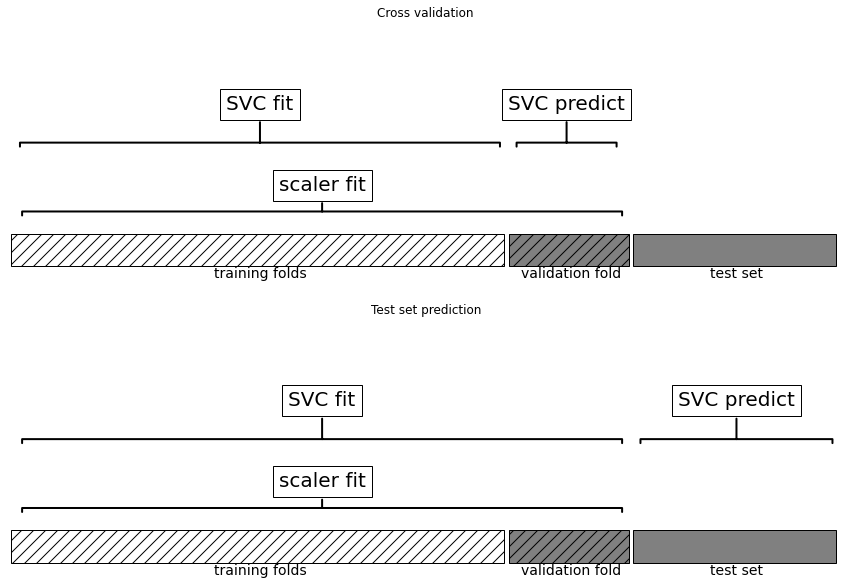

In [9]:
mg.plots.plot_improper_processing()

In [16]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [17]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [18]:
print(pipe.score(X_test, y_test))

0.972027972027972


In [19]:
param_grid = {'svm__C': [.001, .01, .1, 1, 10, 100],
             'svm__gamma': [.001, .01, .1, 1, 10, 100]}

In [20]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.9812311901504789
0.972027972027972
{'svm__C': 1, 'svm__gamma': 1}


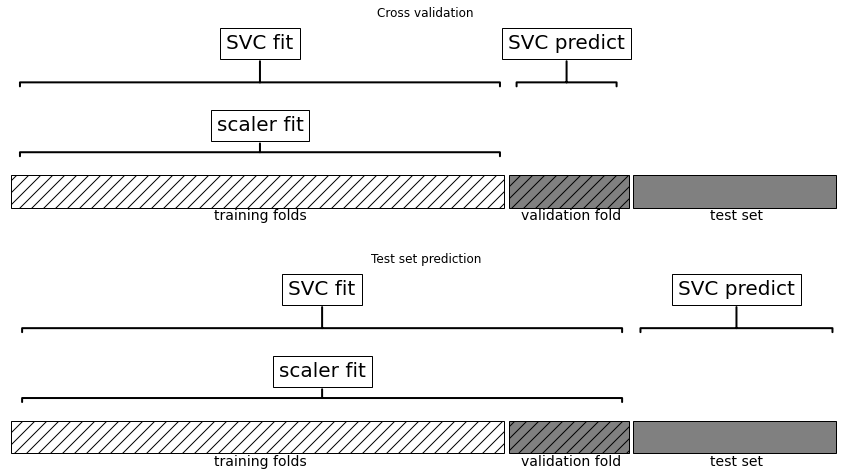

In [21]:
mg.plots.plot_proper_processing()

In [22]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100, ))

In [23]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print(X_selected.shape)

(100, 500)


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print(np.mean(cross_val_score(Ridge(), X_selected, y, cv=5)))

0.9057953065239822


In [25]:
pipe = Pipeline([('select', SelectPercentile(score_func=f_regression, percentile=5)), ('ridge', Ridge())])

print(np.mean(cross_val_score(pipe, X, y, cv=5)))

-0.2465542238495281


In [26]:
def fit(self, X, y):
    X_transformed = X
    
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
        
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [27]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
        
    return self.steps[-1][1].predict(X_transformed)

In [28]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [29]:
print(pipe_short.steps)

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print(pipe.steps)

[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [32]:
pipe.fit(cancer.data)
componets = pipe.named_steps['pca'].components_
print(componets.shape)

(2, 30)


In [33]:
print(componets)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [34]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [35]:
param_grid = {'logisticregression__C': [.01, .1, 1, 10, 100]}

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=4)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [37]:
print(grid.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])


In [38]:
print(grid.best_estimator_.named_steps['logisticregression'])

LogisticRegression(C=1)


In [39]:
print(grid.best_estimator_.named_steps['logisticregression'].coef_)

[[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]


In [40]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [42]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
             'ridge__alpha': [.001, .01, .1, 1, 10, 100]}

In [43]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

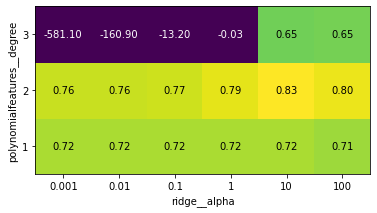

In [44]:
mg.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                xticklabels=param_grid['ridge__alpha'],
                yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [45]:
print(grid.best_params_)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [46]:
print(grid.score(X_test, y_test))

0.768304546410013


In [47]:
param_grid = {'ridge__alpha': [.001, .01, .1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.score(X_test, y_test))

0.6272671927504456


In [48]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [49]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler()],
    'classifier__gamma': [.001, .01, .1, 1, 10, 100],
    'classifier__C': [.001, .01, .1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
    'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}
]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_test, y_test))

{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
0.9858823529411765
0.9790209790209791


In [51]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())],
               memory='cache_folder')